In [1]:
import warnings
warnings.filterwarnings('ignore')
# Numerical libraries
import numpy as np   
# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt 
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [2]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("Country-data.csv")
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [3]:
df['exports']=(df['exports']*df['gdpp'])/100
df['health']=(df['health']*df['gdpp'])/100
df['imports']=(df['imports']*df['gdpp'])/100
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


* as exports health and import is percentage of gdpp that why taking the exact value

## Doing data analysis

In [4]:
# shape of the data
df.shape

(167, 10)

* There are 167 rows and 10 column exist

In [5]:
# giving the data type of indivigual column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


* most of the column are numeric except for the Country one

In [6]:
# null value check
df.isnull().sum(axis=0)/len(df.index)*100

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

* no NaN value exist

In [7]:
# giving the 5point summery of the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.600000,8.2500,19.300,62.10,208.00
exports,167.0,7420.618847,17973.885795,1.076920,447.1400,1777.440,7278.00,183750.00
health,167.0,1056.733204,1801.408906,12.821200,78.5355,321.886,976.94,8663.60
imports,167.0,6588.352108,14710.810418,0.651092,640.2150,2045.580,7719.60,149100.00
income,167.0,17144.688623,19278.067698,609.000000,3355.0000,9960.000,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.210000,1.8100,5.390,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.100000,65.3000,73.100,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.150000,1.7950,2.410,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.000000,1330.0000,4660.000,14050.00,105000.00


* for most of the column the data is highly rightly skewed except for life_expsc which is left skewed

## univarient analysis

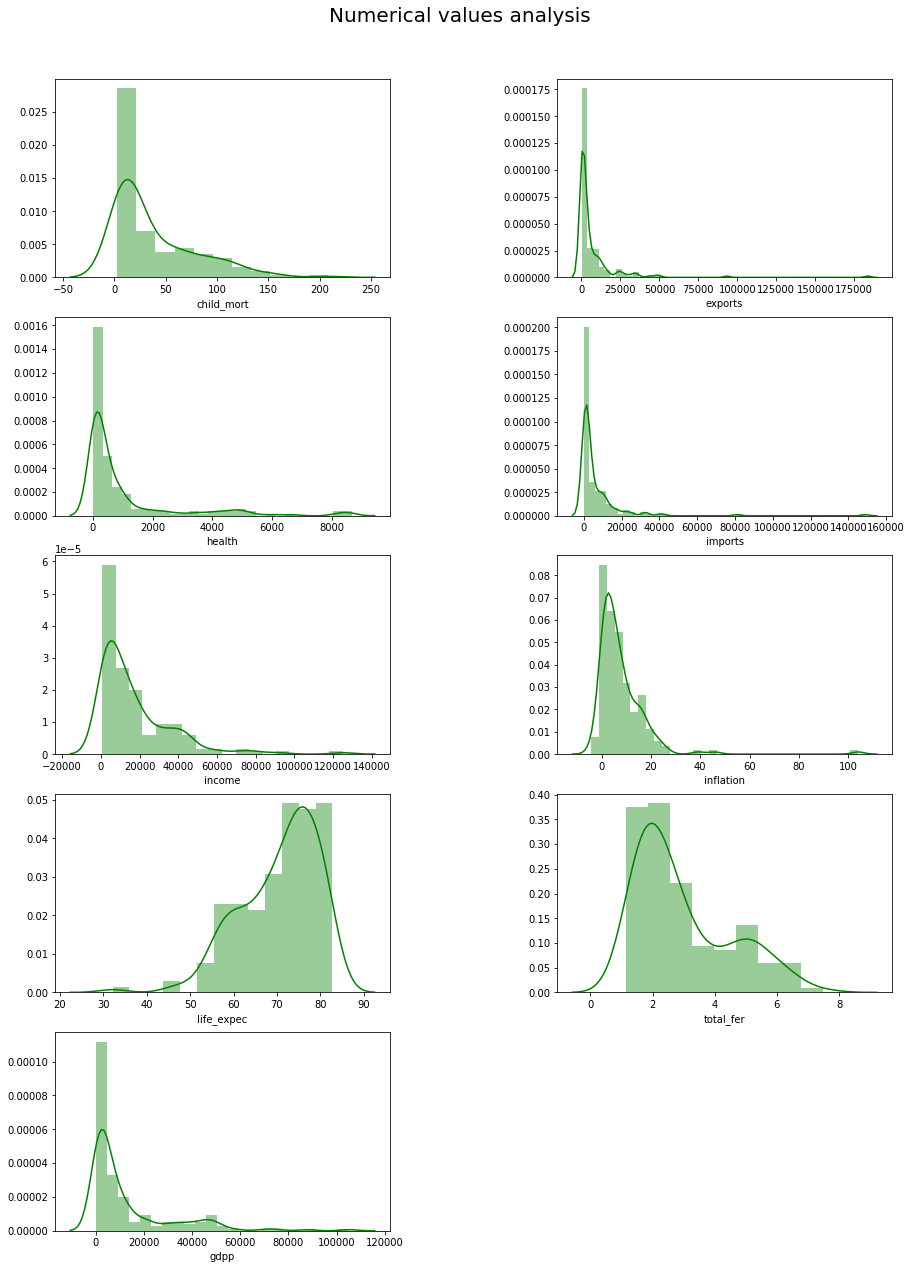

In [8]:
plt.figure(figsize = (15, 20))
count=0
plt.subplots_adjust(
    left   =  0.125,  # the left side of the subplots of the figure
    right  =  0.9,    # the right side of the subplots of the figure
    bottom =  0.1,    # the bottom of the subplots of the figure
    top    =  0.9,    # the top of the subplots of the figure
    wspace =  .5,    # the amount of width reserved for blank space between subplots
    hspace =  0.2    # the amount of height reserved for white space between subplots
)
plt.suptitle("Numerical values analysis", y = .95, fontsize=20)
for feature in df.columns: 
    if str(feature) not in ['country']:  
        plt.subplot(5, 2, count+1)
        sns.distplot(df[feature],color='green')
        count=count+1
plt.show()

* it is clearly visible that there is two cluster from univarient analysis.
* all the feature has got rightly skewed except for the life_expec

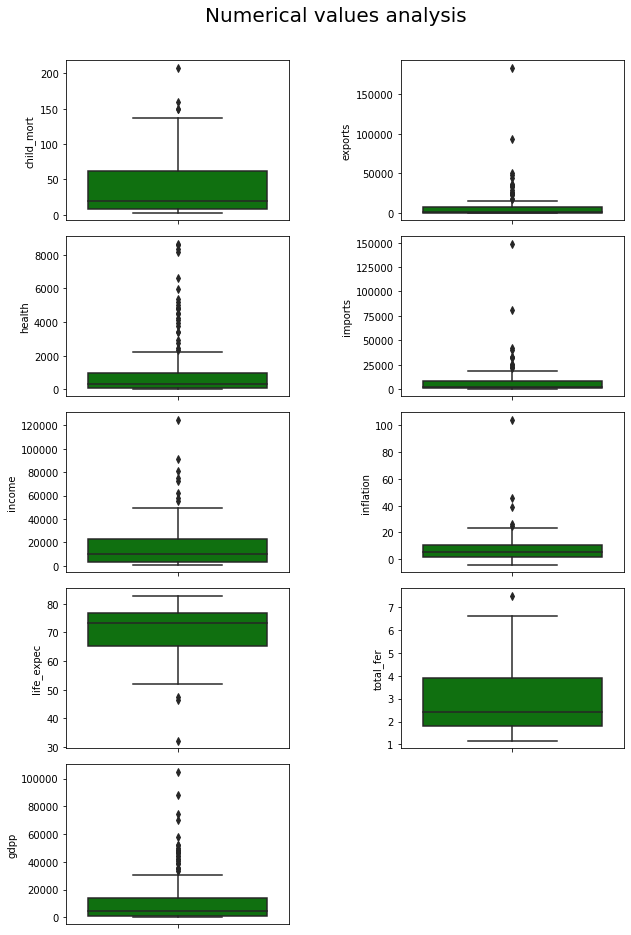

In [9]:
plt.figure(figsize = (10, 15))
count=0
plt.subplots_adjust(
    left   =  0.125,  # the left side of the subplots of the figure
    right  =  0.9,    # the right side of the subplots of the figure
    bottom =  0.1,    # the bottom of the subplots of the figure
    top    =  0.9,    # the top of the subplots of the figure
    wspace =  .5,    # the amount of width reserved for blank space between subplots
    hspace =  0.1    # the amount of height reserved for white space between subplots
)
plt.suptitle("Numerical values analysis", y = 0.95, fontsize=20)
for feature in df.columns: 
    if str(feature) not in ['country']:   
        plt.subplot(5, 2, count+1)
        sns.boxplot(y = feature,data = df,color='green')
        count=count+1
plt.show()

* upper outlier exist for the all the feature except for the life_expec one which has got lower outlier

## multivarient analysis

<Figure size 1080x2160 with 0 Axes>

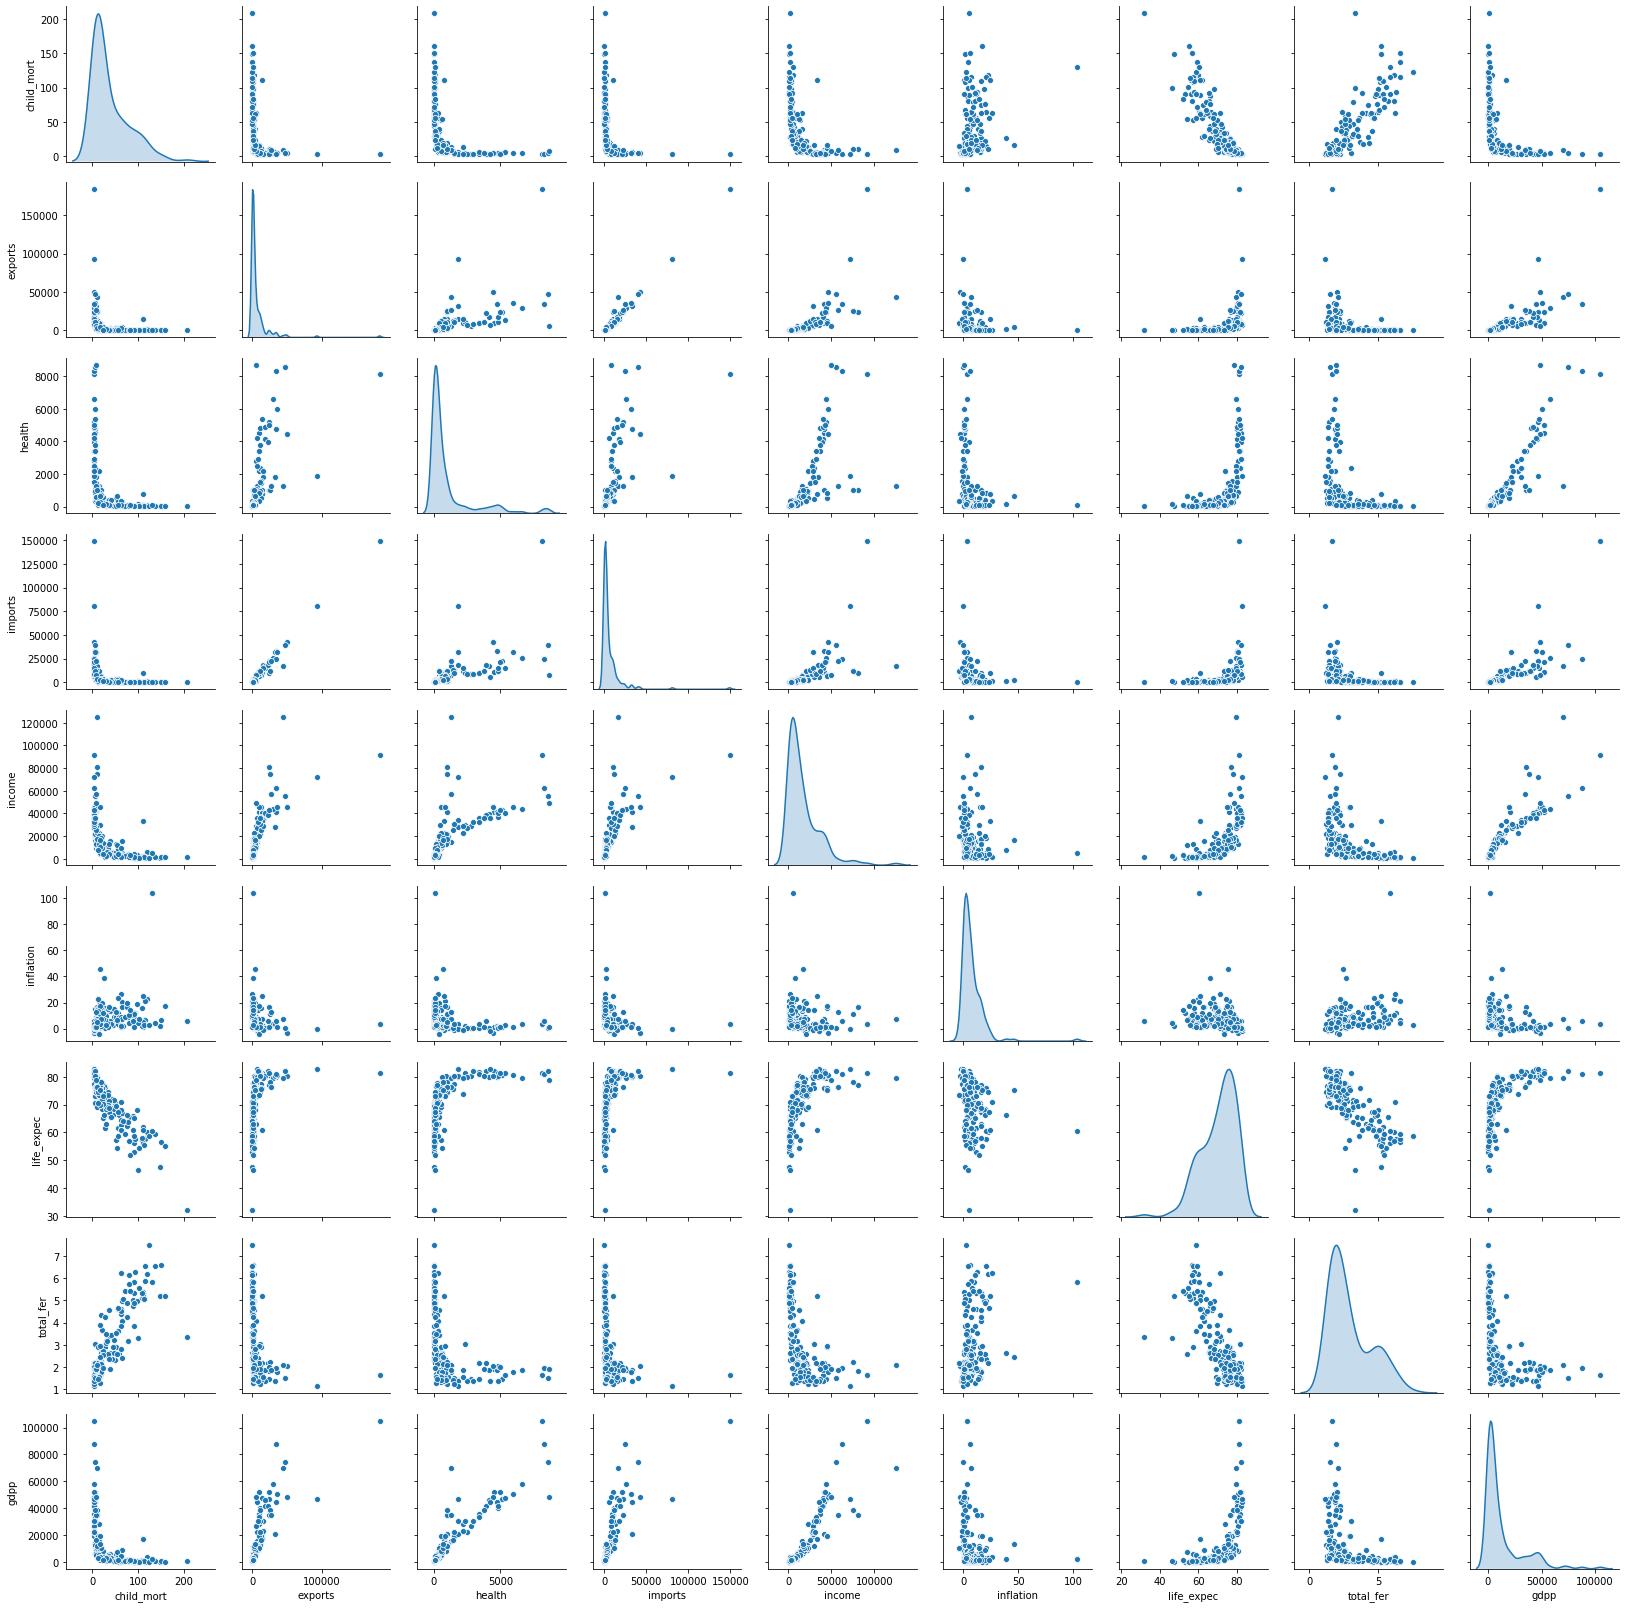

In [10]:
# drawing pair plot
plt.figure(figsize = (15, 30))
sns.pairplot(df, diag_kind = 'kde')
plt.show()

 * from the multivarient analysis one can clearly say that there is sone relation ship preasent between features
 * between gdpp and export,gdpp and imports there is highly poitive relation ship and with health and income there is positive relation ship aswell.
 * between total_fer and chield there is positive relation ship
 * between life_expct and chield_mort there is negative relation ship
 * between import and export there is a high positive realtion ship
 * bttween income and export and health there is positive relationship
 * between health and eport there is high positive relation ship

In [11]:
corr = df.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).reset_index().head(20)

,index,Var1,Var2,Correlation
0,28,imports,exports,0.99
1,74,gdpp,health,0.92
2,76,gdpp,income,0.90
3,54,life_expec,child_mort,0.89
4,63,total_fer,child_mort,0.85
5,73,gdpp,exports,0.77
6,69,total_fer,life_expec,0.76
7,75,gdpp,imports,0.76
8,37,income,exports,0.73
9,38,income,health,0.69


* import and exports has got the highest correlaion

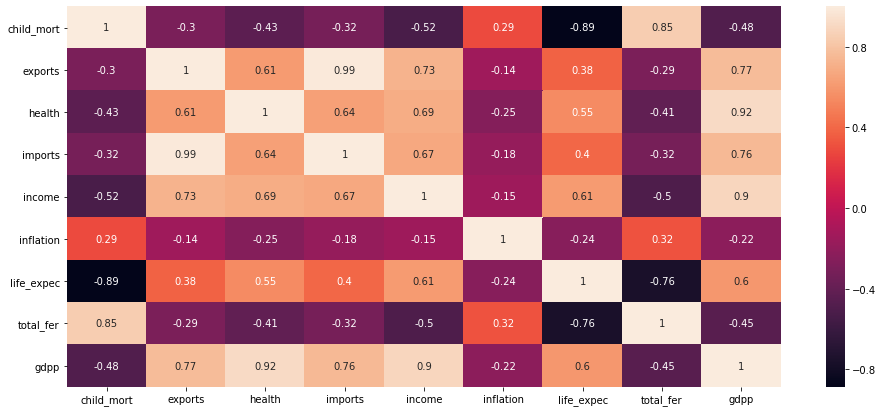

In [12]:
plt.figure(figsize=(16,7))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

* heat map based on the correlation

In [13]:
q4_exports = df['exports'].quantile(0.75)
q4_health = df['health'].quantile(0.75)
q4_imports = df['imports'].quantile(0.75)
q4_income = df['income'].quantile(0.95)
q4_inflation = df['inflation'].quantile(0.75)
q4_life_expec = df['life_expec'].quantile(0.99)
q4_total_fer = df['total_fer'].quantile(0.99)
q4_inflation = df['inflation'].quantile(0.99)
q4_gdpp = df['gdpp'].quantile(0.75)
df['exports'][df['exports']>= q4_exports] = q4_exports
df['health'][df['health']>= q4_health] = q4_health
df['imports'][df['imports']>= q4_imports] = q4_imports
df['income'][df['income']>= q4_income] = q4_income
df['inflation'][df['inflation']>= q4_inflation] = q4_inflation
df['life_expec'][df['life_expec']>= q4_life_expec] = q4_life_expec
df['total_fer'][df['total_fer']>= q4_total_fer] = q4_total_fer
df['inflation'][df['inflation']>= q4_inflation] = q4_inflation
df['gdpp'][df['gdpp']>= q4_gdpp] = q4_gdpp

* as the busuness want us to find out for what country the aid is permisable
* that means high child_mort,low income and log gdpp.
* that is the reason we cannot cap the lower outlier which doesnot exist for most of the feature except for lifr_expcc.
* now we cannot cap higher outlier for child mortalty which has a negative relation with life expectance that means we cannot cap high child mortalty outlier and low life expetance outlier .
* we can only do high outlier capinng for all other feature except for child mortalty and life_expectancy(higher out lier doesnot exist)

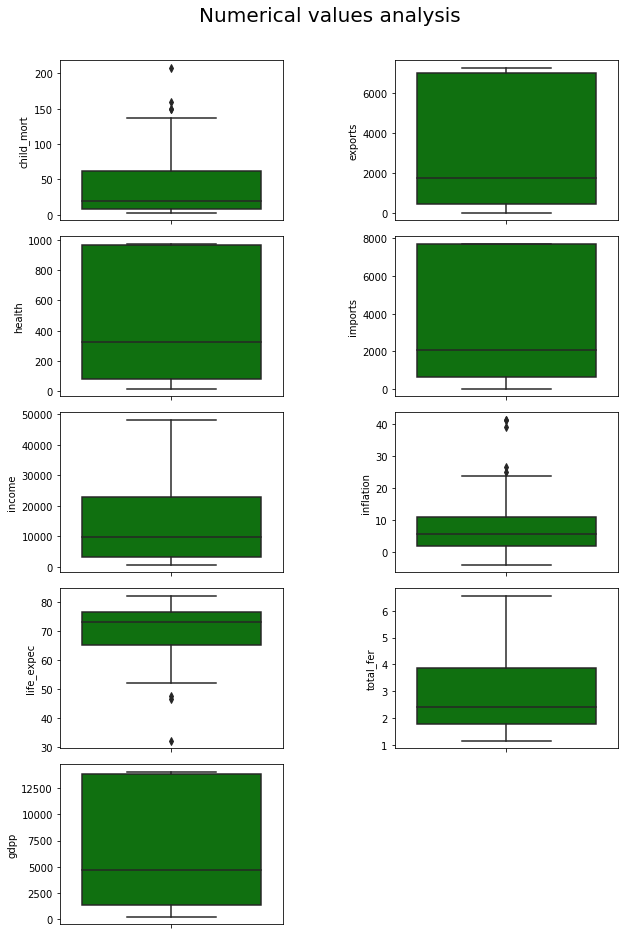

In [14]:
plt.figure(figsize = (10, 15))
count=0
plt.subplots_adjust(
    left   =  0.125,  # the left side of the subplots of the figure
    right  =  0.9,    # the right side of the subplots of the figure
    bottom =  0.1,    # the bottom of the subplots of the figure
    top    =  0.9,    # the top of the subplots of the figure
    wspace =  .5,    # the amount of width reserved for blank space between subplots
    hspace =  0.1    # the amount of height reserved for white space between subplots
)
plt.suptitle("Numerical values analysis", y = 0.95, fontsize=20)
for feature in df.columns: 
    if str(feature) not in ['country']:   
        plt.subplot(5, 2, count+1)
        sns.boxplot(y = feature,data = df,color='green')
        count=count+1
plt.show()

* after capping

In [15]:
# Check the hopkins

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Kmean clustering

In [16]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [17]:
hopkins(df.drop('country', axis = 1))

0.8927905201026487

* hopkins statistice is given more than 80% rating ideal for clustering

In [18]:
scaler=preprocessing.MinMaxScaler()
df1 = scaler.fit_transform(df.drop('country', axis = 1))
df1

array([[0.42648491, 0.00745137, 0.03017906, ..., 0.47941118, 0.86264223,
        0.02330125],
       [0.06815969, 0.15722622, 0.26456677, ..., 0.87925204, 0.09235998,
        0.2792532 ],
       [0.12025316, 0.23520423, 0.17960525, ..., 0.88323056, 0.32141274,
        0.30602793],
       ...,
       [0.10077897, 0.12946723, 0.07964039, ..., 0.81559578, 0.14777597,
        0.0780809 ],
       [0.26144109, 0.05385835, 0.05708508, ..., 0.70419733, 0.65021428,
        0.0780809 ],
       [0.39191821, 0.07408668, 0.07589604, ..., 0.39586234, 0.78505985,
        0.08893552]])

* using min max scaler as outlier is present

In [19]:
df1 = pd.DataFrame(df1, columns = df.columns[1:])
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.007451,0.030179,0.032083,0.020994,0.298766,0.479411,0.862642,0.023301
1,0.068160,0.157226,0.264567,0.257430,0.195487,0.190422,0.879252,0.092360,0.279253
2,0.120253,0.235204,0.179605,0.181344,0.257776,0.444537,0.883231,0.321413,0.306028
3,0.566699,0.302066,0.091051,0.196104,0.110967,0.582429,0.556992,0.925447,0.238729
4,0.037488,0.762674,0.749740,0.930846,0.387806,0.123665,0.889198,0.181026,0.866126


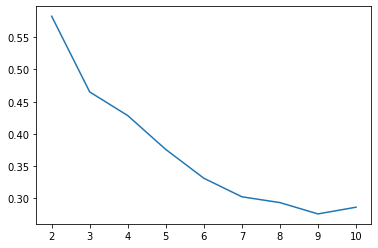

In [20]:
# Choose the value of K
# Silhouette score
# Elbow curve-ssd

from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

* silhouette is giving 3

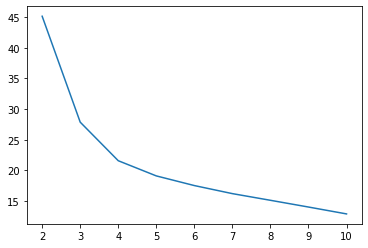

In [21]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])

* elbow curve has bent in 3 and 4
#### taking the least one 3 best cluster

In [22]:
# K=3
# Final Kmean Clustering

kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [23]:
df_kmean = df.copy()

In [24]:
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

,label
0,2
1,0
2,0
3,2
4,1


In [25]:
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,1


In [26]:
df_kmean.label.value_counts()

0    60
2    54
1    53
Name: label, dtype: int64

* it has provided balance 3 cluster

## as we are mose concern about child mortality,gdp and income ploting the data based on on the cluster

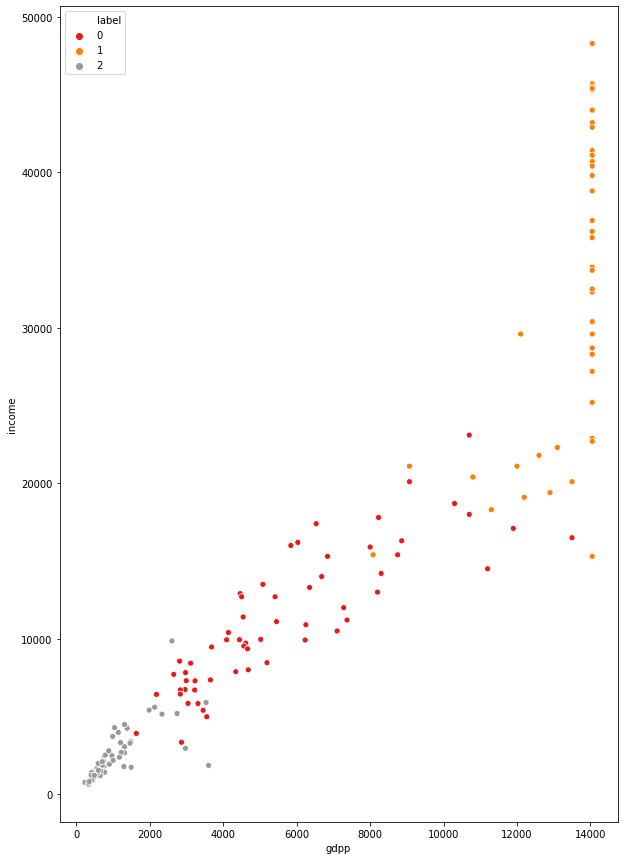

In [27]:
plt.figure(figsize = (10, 15))
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'label', data = df_kmean, palette = 'Set1')
plt.show()

* one can validate the cluster segrigation is more or less proper between gdpp and income

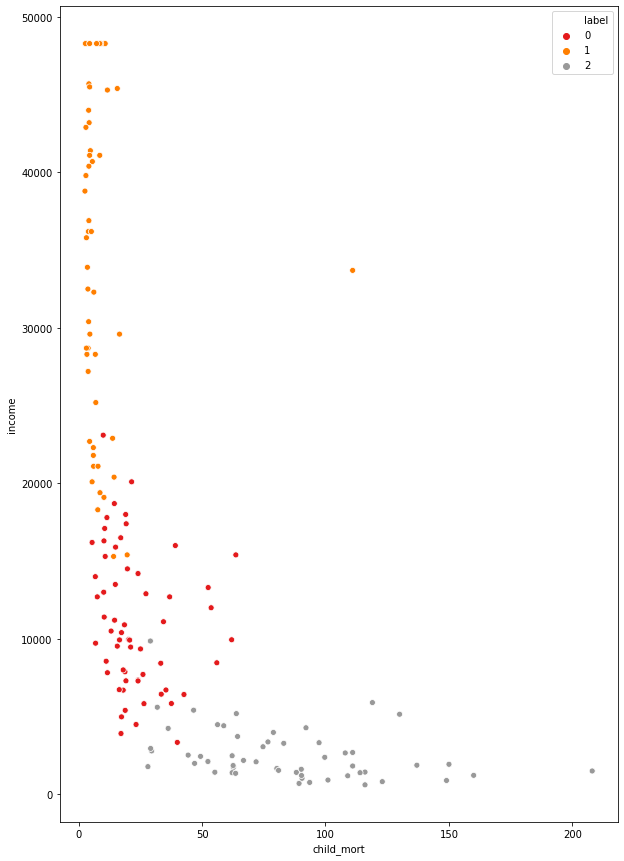

In [28]:
plt.figure(figsize = (10, 15))
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'label', data = df_kmean, palette = 'Set1')
plt.show()

* one can validate the cluster segrigation is more or less proper between chield_mortality and income

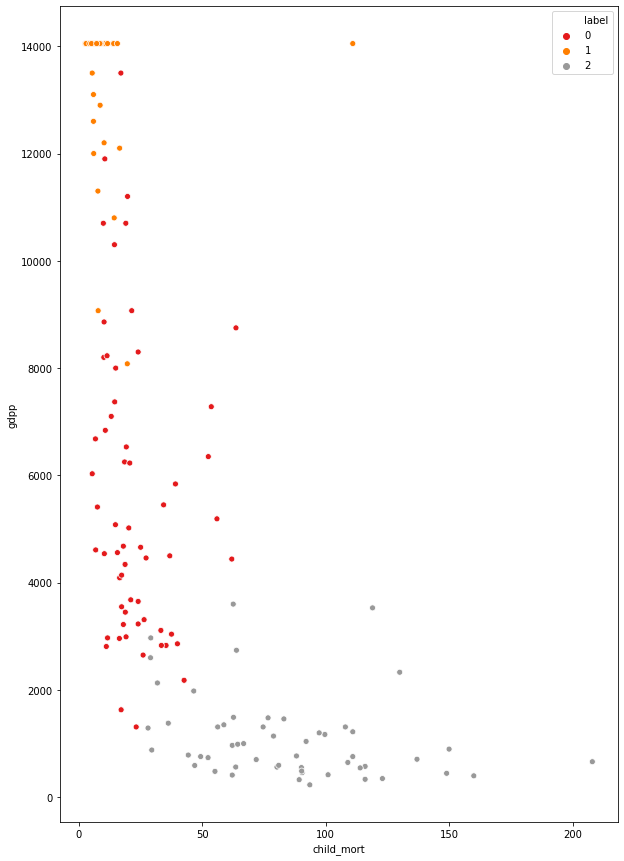

In [29]:
plt.figure(figsize = (10, 15))
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'label', data = df_kmean, palette = 'Set1')
plt.show()

* one can validate the cluster segrigation is more or less proper between gdpp and child mortality

## Cluster profiling

Populating the interactive namespace from numpy and matplotlib


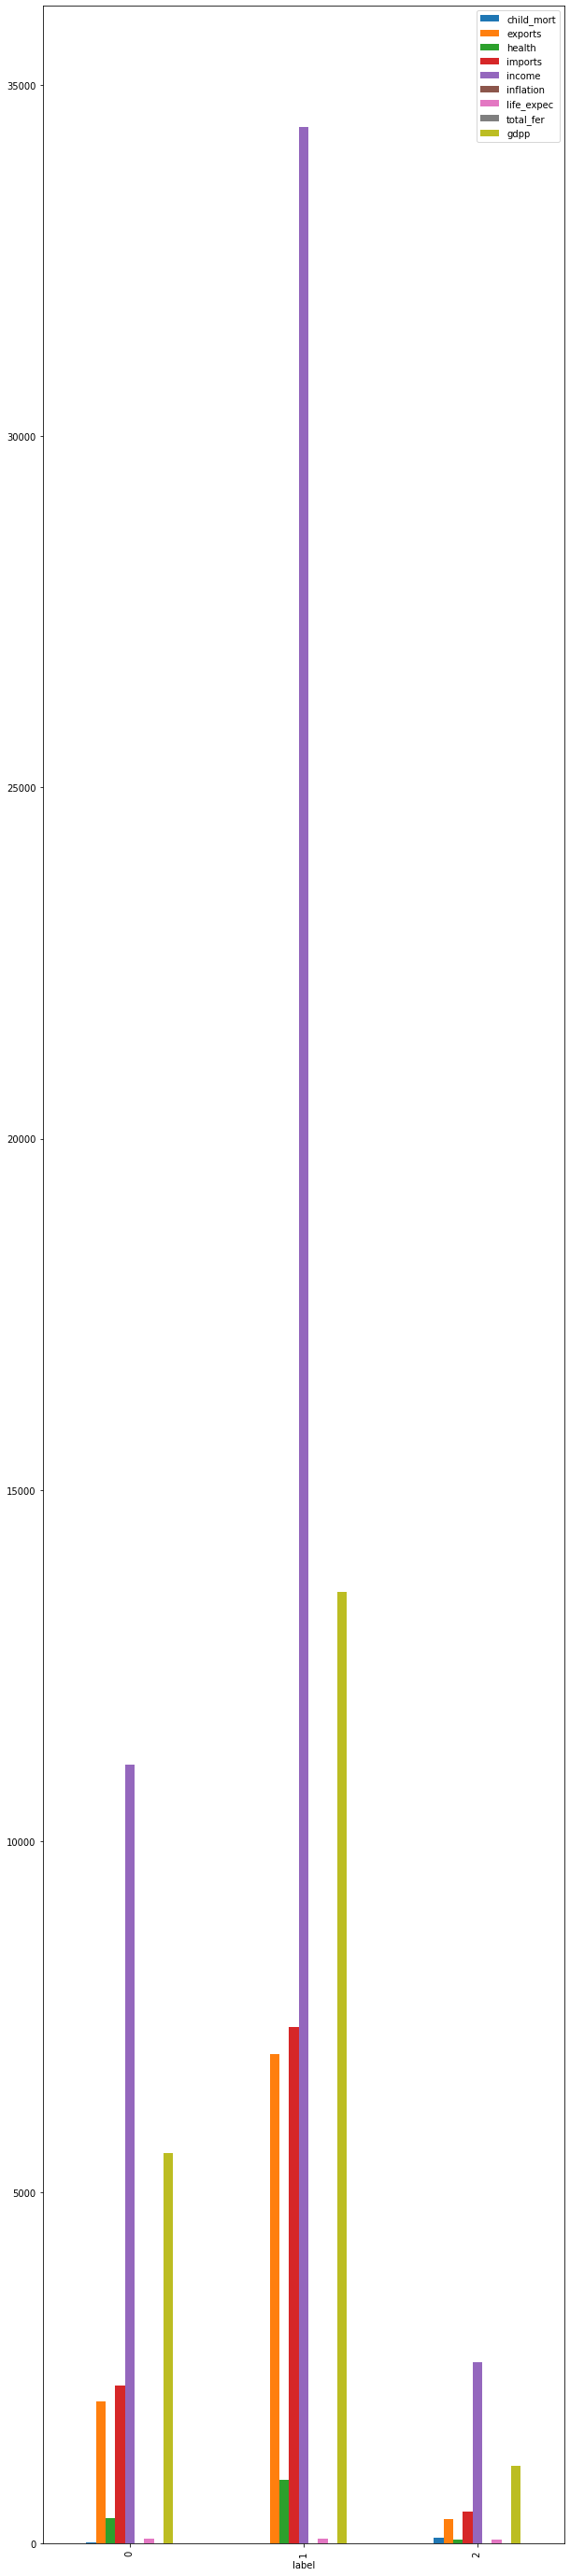

In [30]:
# Making sense out of the clsuters
%pylab inline
df_kmean.drop('country', axis = 1).groupby('label').mean().plot.bar(figsize(10,50))
plt.show()

* getting a view of how all the feature are distribiued between different cluster.

Populating the interactive namespace from numpy and matplotlib


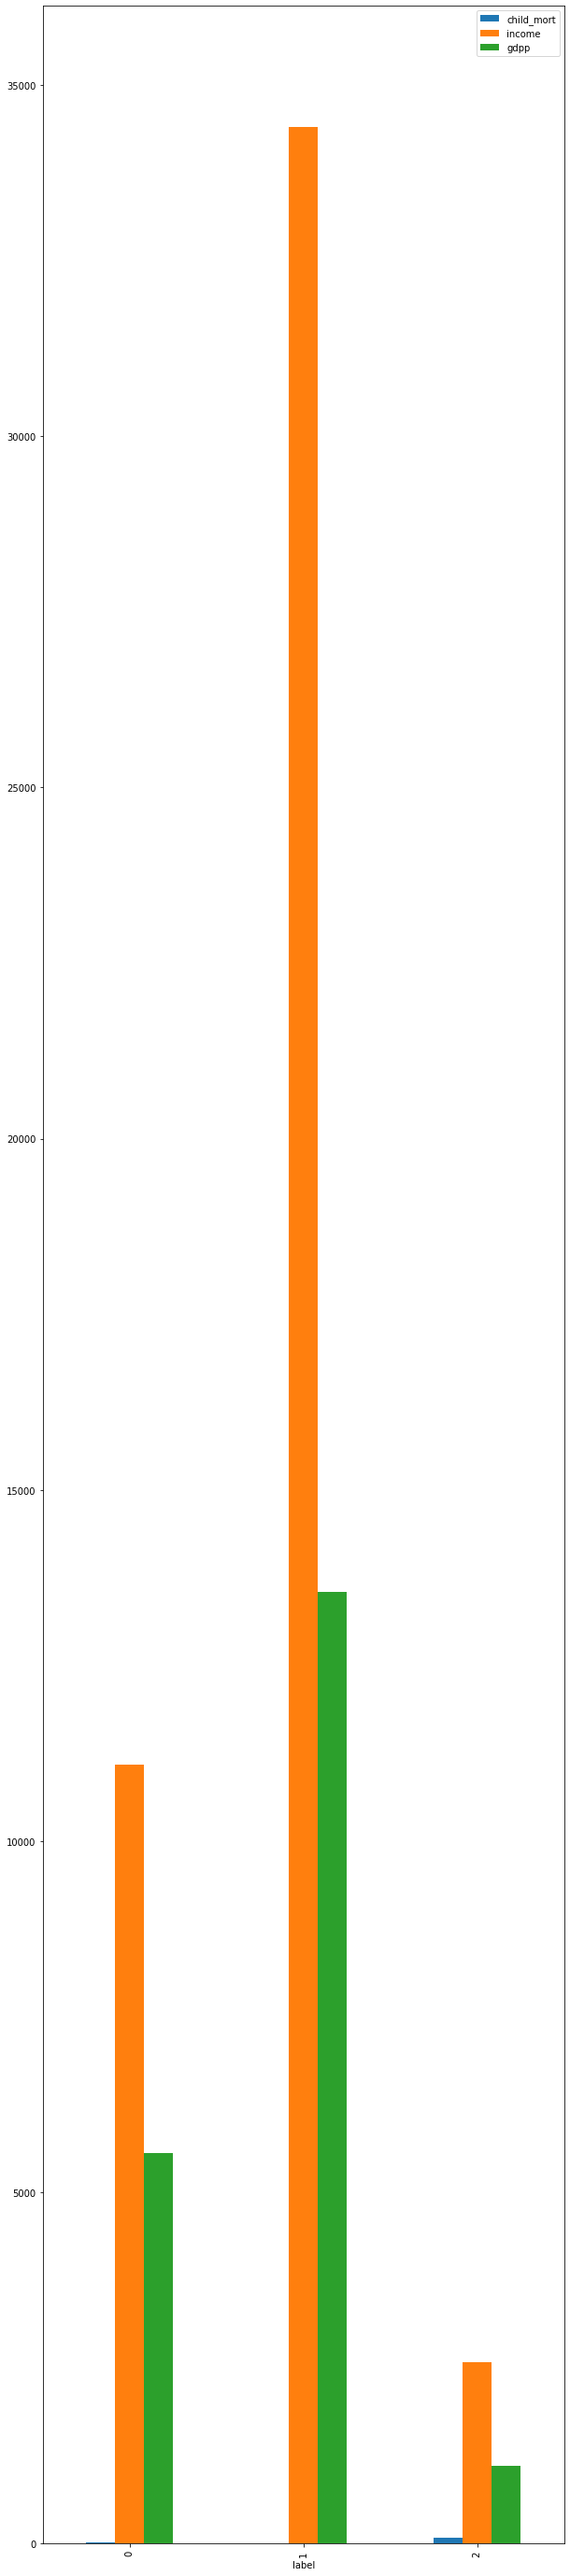

In [31]:
%pylab inline
df_kmean.drop(['country', 'exports', 'health','imports','inflation','life_expec','total_fer','inflation'],axis = 1).groupby('label').mean().plot.bar(figsize(10,50))
plt.show()

* our concern feature income,gdpp,child mortality cluster segrigation one can see from this cluster 2 has got the lowest income and gdpp but high child mortality

In [32]:
df_kmean[df_kmean['label'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30000,41.9174,248.297000,1610.0,9.440,56.2,5.8200,553,2
3,Angola,119.0,2199.19000,100.6050,1514.370000,5900.0,22.400,60.1,6.1600,3530,2
12,Bangladesh,49.4,121.28000,26.6816,165.244000,2440.0,7.140,70.4,2.3300,758,2
17,Benin,111.0,180.40400,31.0780,281.976000,1820.0,0.885,61.8,5.3600,758,2
19,Bolivia,46.6,815.76000,95.8320,679.140000,5410.0,8.780,71.6,3.2000,1980,2
25,Burkina Faso,116.0,110.40000,38.7550,170.200000,1430.0,6.810,57.9,5.8700,575,2
26,Burundi,93.6,20.60520,26.7960,90.552000,764.0,12.300,57.7,6.2600,231,2
27,Cambodia,44.4,425.22600,44.6448,467.670000,2520.0,3.120,66.1,2.8800,786,2
28,Cameroon,108.0,290.82000,67.2030,353.700000,2660.0,1.910,57.3,5.1100,1310,2
31,Central African Republic,149.0,52.62800,17.7508,118.190000,888.0,2.010,47.5,5.2100,446,2


In [33]:
df_kmean[df_kmean['label'] == 2].sort_values(by = ['income','gdpp','child_mort'], ascending = [True, True,False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334,2
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327,2
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446,2


* sorthing the data based on high child mortality low income and low gdpp

## Hierarchical Clustering

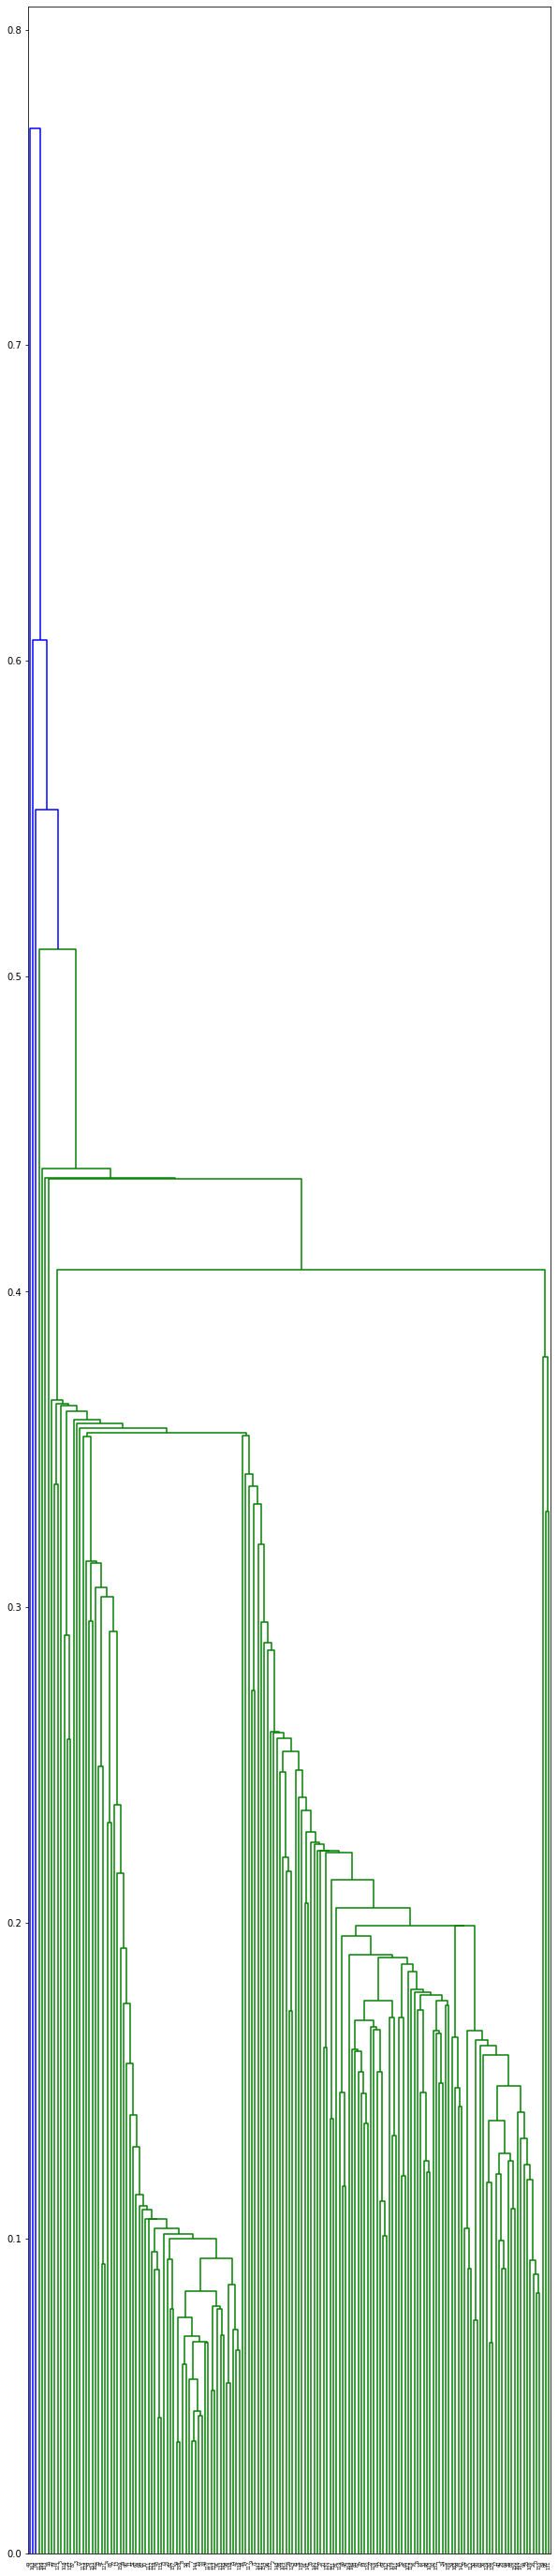

In [34]:
# single linkage
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

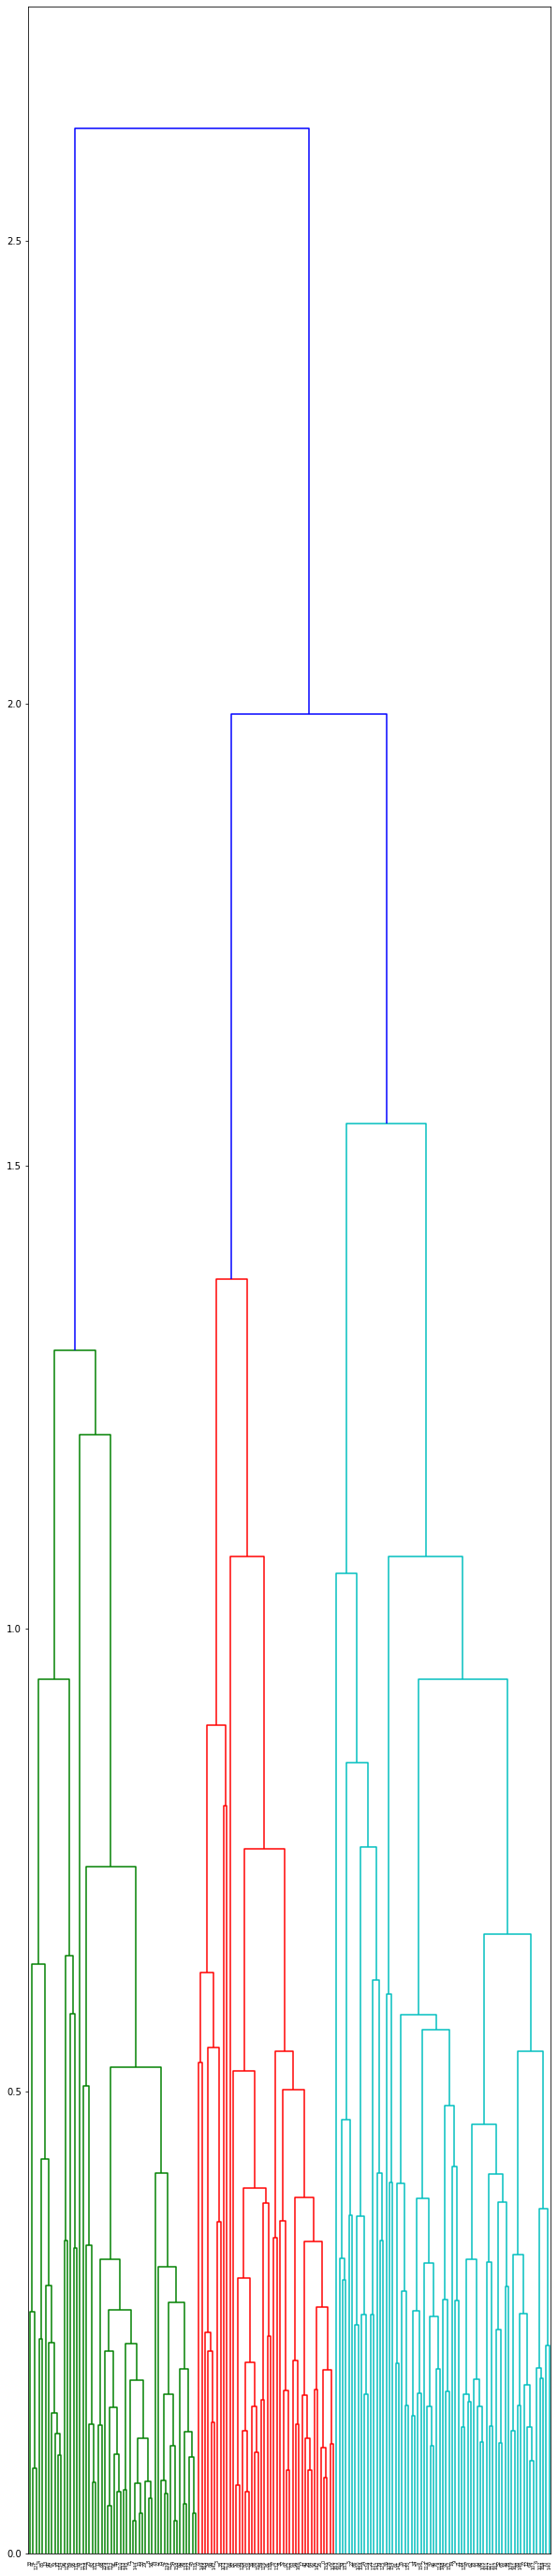

In [35]:
# complete linkage
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### one can suggest that complete linkage gives proper segrigation to the data

In [36]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 2, 0, 2, 1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0,
       0, 2, 2, 2, 1, 0, 0, 2, 2, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2,
       0, 2, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [37]:
df_Hierarchical = df.copy()

In [38]:
label  = pd.DataFrame(cluster_labels, columns= ['label'])
label.head()

,label
0,0
1,1
2,1
3,0
4,2


In [39]:
df_Hierarchical = pd.concat([df_Hierarchical, label], axis =1)
df_Hierarchical.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,2


In [40]:
df_Hierarchical.label.value_counts()

1    69
2    54
0    44
Name: label, dtype: int64

* the cluster are more or less balanced

## as we are mose concern about child mortality,gdp and income ploting the data based on on the cluster

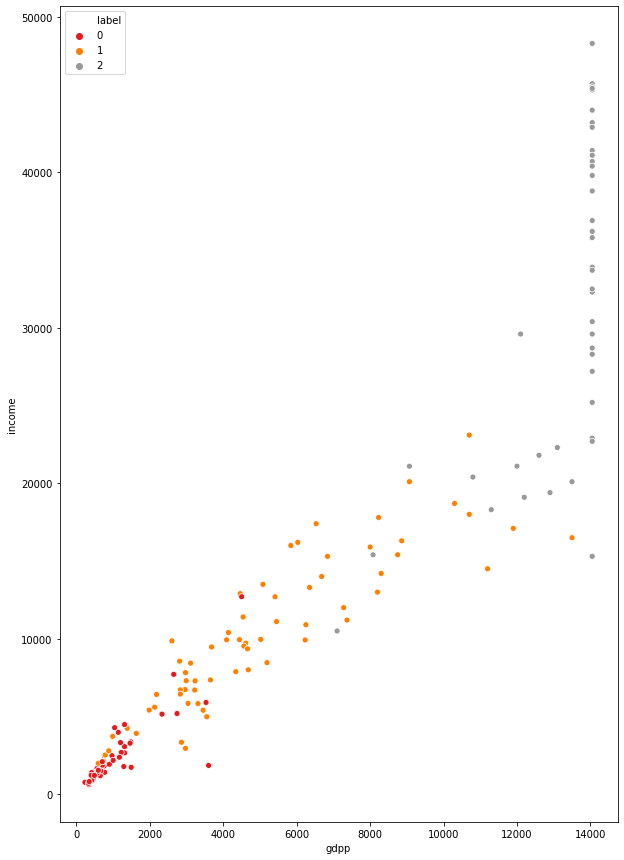

In [41]:
plt.figure(figsize = (10, 15))
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'label', data = df_Hierarchical, palette = 'Set1')
plt.show()

* one can validate the cluster segrigation is more or less proper between gdpp and income

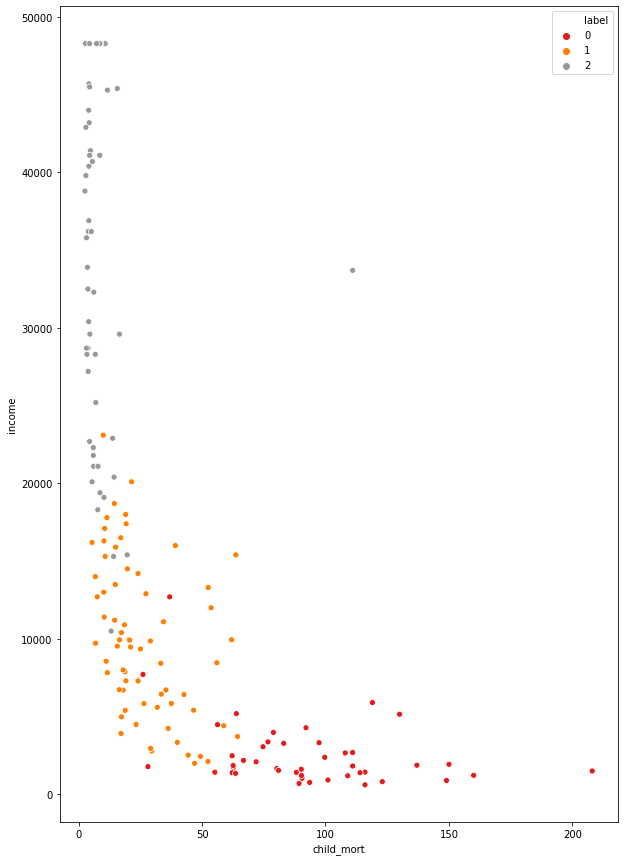

In [42]:
plt.figure(figsize = (10, 15))
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'label', data = df_Hierarchical, palette = 'Set1')
plt.show()

* one can validate the cluster segrigation is more or less proper between chield_mortality and income

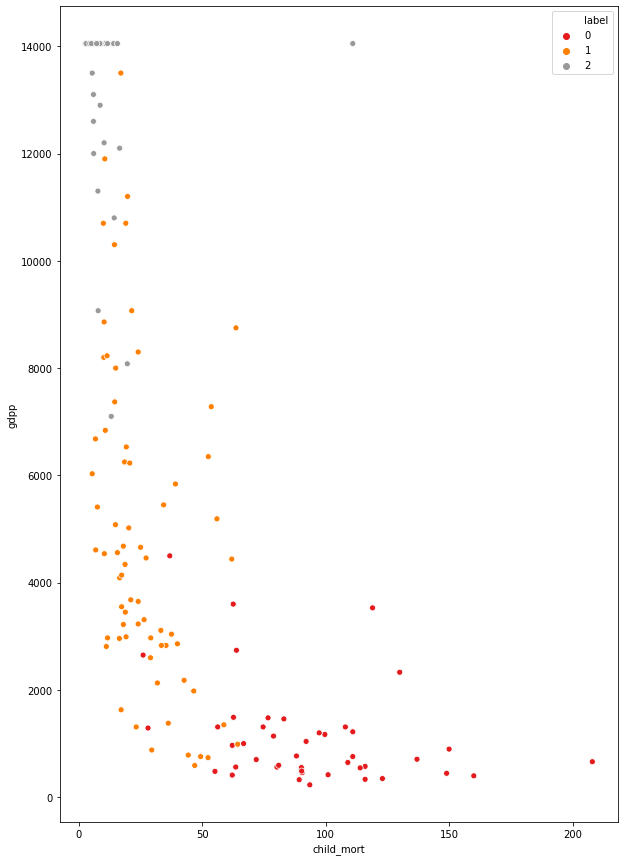

In [43]:
plt.figure(figsize = (10, 15))
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'label', data = df_Hierarchical, palette = 'Set1')
plt.show()

* one can validate the cluster segrigation is more or less proper between gdpp and child mortality

## Cluster profiling

Populating the interactive namespace from numpy and matplotlib


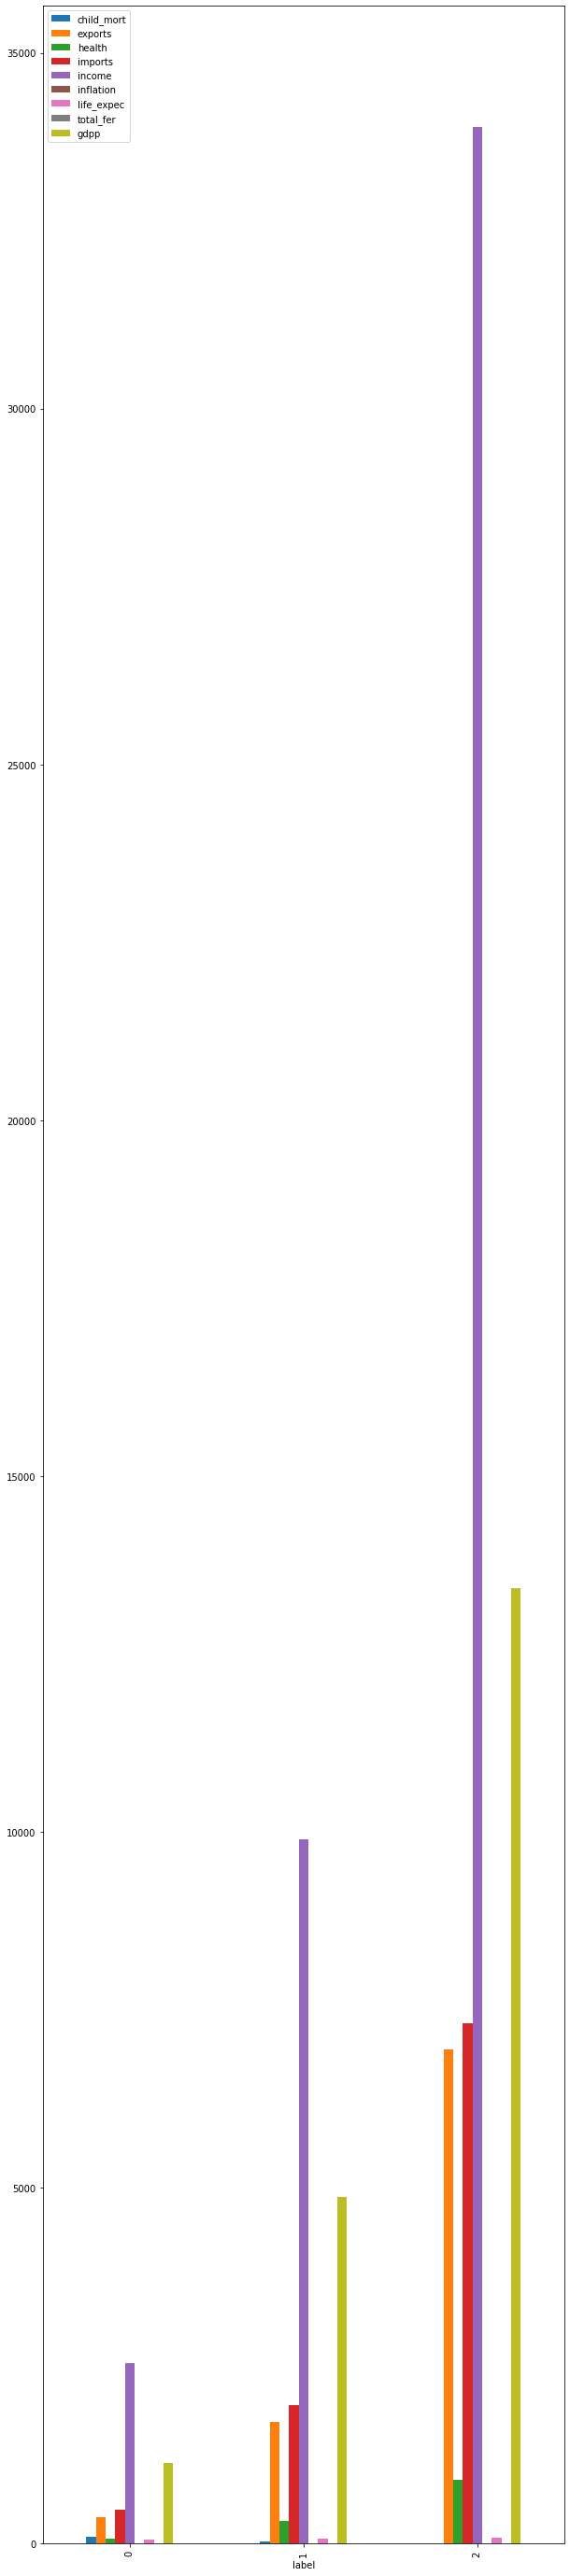

In [44]:
# Making sense out of the clsuters
%pylab inline
df_Hierarchical.drop('country', axis = 1).groupby('label').mean().plot.bar(figsize(10,50))
plt.show()## Cluster profiling

* getting a view of how all the feature are distribiued between different cluster.

Populating the interactive namespace from numpy and matplotlib


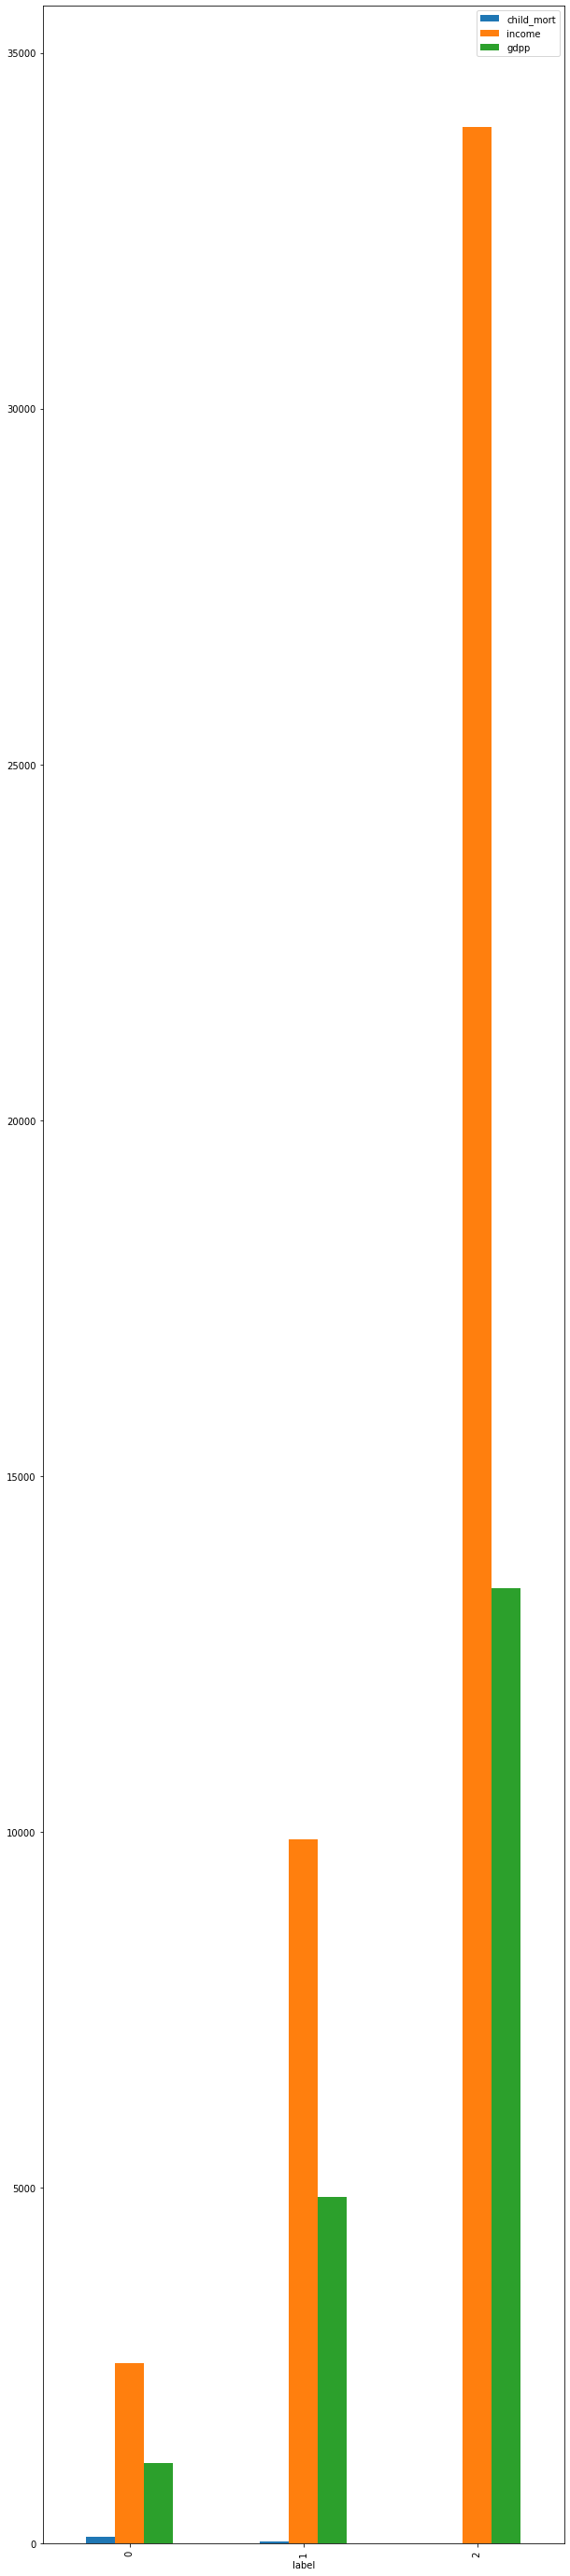

In [45]:
%pylab inline
df_Hierarchical.drop(['country', 'exports', 'health','imports','inflation','life_expec','total_fer','inflation'],axis = 1).groupby('label').mean().plot.bar(figsize(10,50))
plt.show()

* our concern feature income,gdpp,child mortality cluster segrigation one can see from this cluster 0 has got the lowest income and gdpp but high child mortality

In [46]:
df_Hierarchical[df_Hierarchical['label'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.8200,553,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.1600,3530,0
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.3600,758,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.8700,575,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.2600,231,0
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.1100,1310,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446,0
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.5636,897,0
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.7500,769,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.5400,334,0


In [47]:
df_Hierarchical[df_Hierarchical['label'] == 0].sort_values(by = ['income','gdpp','child_mort'], ascending = [True, True,False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446,0


* sorthing the data based on high child mortality low income and low gdpp

## Conclusion
one can suggest that 
'Congo, Dem. Rep.',
'Liberia',
'Burundi',
'Niger',
'Central African Republic' are in dire need for AID 
* as per both cluster analysis